In [1]:
# Import Libraries 
import nltk
from nltk.corpus import twitter_samples
import os
import sys
import numpy as np 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [2]:
path = os.getcwd()
sys.path.append(path)

In [3]:
# Download the data and stop words
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/rohan/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
# Get the positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Display the type of both 'positive_tweets' and 'negative_tweets'
print(f"Type for positive & negative tweets: {type(positive_tweets)}")

# Display number of positive and negative tweets
print(f"Number of Positive Tweets: {len(positive_tweets)}")
print(f"Number of Negative Tweets: {len(negative_tweets)}")

Type for positive & negative tweets: <class 'list'>
Number of Positive Tweets: 5000
Number of Negative Tweets: 5000


In [5]:
# Split the training data into a 80-20 split
train_split = 0.8
positive_tweets_train = positive_tweets[:int(train_split * len(positive_tweets))]
negative_tweets_train = negative_tweets[:int(train_split * len(negative_tweets))]

positive_tweets_test = positive_tweets[int(train_split * len(positive_tweets)):]
negative_tweets_test = negative_tweets[int(train_split * len(negative_tweets)):]

In [6]:
# Process the training data
from utils.data_process import process_tweet
positive_tweets_train, negative_tweets_train = process_tweet(positive_tweets_train, negative_tweets_train)

[nltk_data] Downloading package stopwords to /Users/rohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Find the frequencies of each word in both positive sentiment & negative sentiment corpuses
from utils.data_process import find_frequencies
positive_freq, negative_freq = find_frequencies(positive_tweets_train, negative_tweets_train)

In [8]:
from utils.data_process import build_feature_vector

# Concatenate both positive tweets and negative tweets
train_tweets = positive_tweets_train + negative_tweets_train

# Create the instance of train matrix
train_matrix = np.empty((0, 3), int)

for tweet in train_tweets:
    feature_vector = np.array(build_feature_vector(tweet, positive_freq, negative_freq))
    train_matrix = np.vstack((train_matrix, feature_vector))

# Create the sentiment array
Y = np.concatenate((np.ones(len(positive_tweets_train)), np.zeros(len(negative_tweets_train))))

## Train Model

In [11]:
# Import the logistic regression model
from logistic_regression import Logistic_Regression_GD

# Create an instance of the logistic regression model
model = Logistic_Regression_GD(0.01, 200)

# Train the model 
model.fit(train_matrix, Y)

/Users/rohan/Desktop/NLP-Projects/Tweet-Sentiment-Analysis/logistic_regression.py:27: RuntimeWarning: overflow encountered in exp
  result = 1 / (1 + np.exp((-1 * value)))


array([ 9.93916335e-01,  8.56809181e+02, -1.00921848e+03])

In [12]:
# Compute the precision, recall, f1-score, and accuracy of sentiment
y_pred = []
# Loop through each value in the train matrix 
for i in range(0, len(train_matrix)):
    y_pred.append(model.predict(train_matrix[i]))

# Compute all metric scores
accuracy = accuracy_score(Y, y_pred)
precision = precision_score(Y, y_pred)
recall = recall_score(Y, y_pred)
f1 = f1_score(Y, y_pred)

# Display the scores
print(f"Train Accuracy: {accuracy*100:.2f}%")
print(f"Train Precision: {precision*100:.2f}%")
print(f"Train Recall: {recall*100:.2f}%")
print(f"Train F1-Score: {f1*100:.2f}%")
    

Train Accuracy: 98.30%
Train Precision: 100.00%
Train Recall: 96.60%
Train F1-Score: 98.27%


## Test Model

In [13]:
# Process the positive and negative test tweets
positive_tweets_test, negative_tweets_test = process_tweet(positive_tweets_test, negative_tweets_test)

# Get the frequencies of each word in both positive and negative tweets
positive_frequencies, negative_frequencies = find_frequencies(positive_tweets_test, negative_tweets_test)

# Concatenate both tweets
test_tweets = positive_tweets_test + negative_tweets_test

test_matrix = np.empty((0, 3), int)

for tweet in test_tweets:
    feature_vector = np.array(build_feature_vector(tweet, positive_frequencies, negative_frequencies))
    test_matrix = np.vstack((test_matrix, feature_vector))

y_true = np.concatenate((np.ones(len(positive_tweets_test)), np.zeros(len(negative_tweets_test))))

[nltk_data] Downloading package stopwords to /Users/rohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Compute the precision, recall, f1-score, and accuracy of sentiment
y_pred = []
# Loop through each value in the train matrix 
for i in range(0, len(test_matrix)):
    y_pred.append(model.predict(test_matrix[i]))

# Compute all metric scores
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Display the scores
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Precision: {precision*100:.2f}%")
print(f"Test Recall: {recall*100:.2f}%")
print(f"Test F1-Score: {f1*100:.2f}%")
    

Test Accuracy: 98.65%
Test Precision: 100.00%
Test Recall: 97.30%
Test F1-Score: 98.63%


/Users/rohan/Desktop/NLP-Projects/Tweet-Sentiment-Analysis/logistic_regression.py:27: RuntimeWarning: overflow encountered in exp
  result = 1 / (1 + np.exp((-1 * value)))


## Visualization

<Axes: >

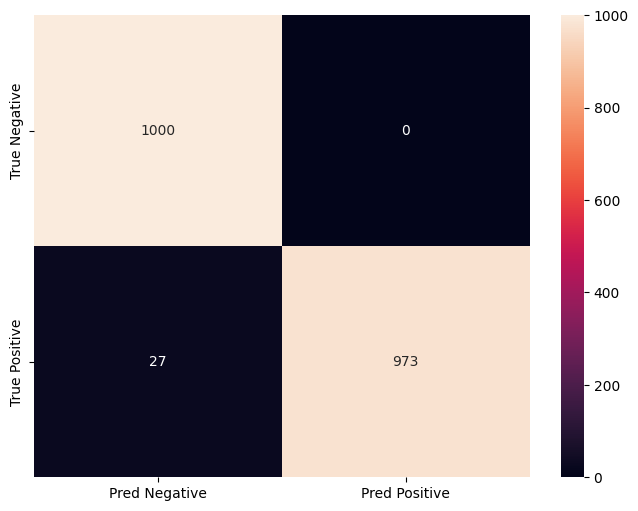

In [18]:
# Display confusion matrix 
matrix = confusion_matrix(y_true, y_pred)
table = pd.DataFrame(matrix, columns=['Pred Negative', 'Pred Positive'], index=['True Negative', 'True Positive'])
plt.figure(figsize=(8, 6))
sns.heatmap(table, annot=True, fmt="d")